In [1]:
# MATPLOTLIB INTERACTIVE VISUALIZATION. REMOVE (OR COMMENT) IF YOU NEED TO PRINT THE NOTEBOOK AS A PDF, SOMETIMES IT DOES NOT WORK WELL...
#%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor


# pd.options.display.max_rows = 9999
pd.options.display.max_columns = 200

#set initial random state
rs = 328537
np.random.seed(rs)

In [2]:
DATASETPATH = "./data/DSL_Winter_Project_2024/DSL_Winter_Project_2024/development.csv"
dataset = pd.read_csv(DATASETPATH)

display(dataset)

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],rms[1],pmax[2],negpmax[2],area[2],tmax[2],rms[2],pmax[3],negpmax[3],area[3],tmax[3],rms[3],pmax[4],negpmax[4],area[4],tmax[4],rms[4],pmax[5],negpmax[5],area[5],tmax[5],rms[5],pmax[6],negpmax[6],area[6],tmax[6],rms[6],pmax[7],negpmax[7],area[7],tmax[7],rms[7],pmax[8],negpmax[8],area[8],tmax[8],rms[8],pmax[9],negpmax[9],area[9],tmax[9],rms[9],pmax[10],negpmax[10],area[10],tmax[10],rms[10],pmax[11],negpmax[11],area[11],tmax[11],rms[11],pmax[12],negpmax[12],area[12],tmax[12],rms[12],pmax[13],negpmax[13],area[13],tmax[13],rms[13],pmax[14],negpmax[14],area[14],tmax[14],rms[14],pmax[15],negpmax[15],area[15],tmax[15],rms[15],pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,22.600000,1.563902,6.084506,-19.892543,3.132328,72.2,1.456865,3.811328,-23.747293,3.621973,15.200000,1.531228,4.893027,-18.008972,7.215259,70.594160,0.938042,9.322305,-19.477101,5.520791,72.400000,1.412877,3.077338,-19.239130,2.079597,28.400000,1.242361,3.633856,-17.555292,1.456941,66.400000,1.521403,26.581253,-15.625539,13.374258,72.200000,1.211460,99.361264,-56.828006,48.422567,72.0,0.971254,42.068393,-19.716336,23.152819,72.000000,1.285425,12.438458,-18.148151,7.611376,72.200000,0.904157,4.559802,-18.432141,2.288938,38.40000,0.939772,7.454877,-16.861163,4.191909,72.600000,1.184943,6.611877,-17.685799,4.884680,162.800000,1.284969,149.648736,-18.546884,146.036298,72.276594,1.196239,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,111.875058,1.228058,4.507257,-3.787175,3.267461,55.0,1.709002,3.940369,-5.427002,3.444678,200.200000,1.172497,5.549379,-4.670676,6.666403,156.598535,1.109768,9.373914,-3.896777,6.821667,71.000000,1.489011,5.424356,-4.675986,5.481520,70.600000,1.684811,5.126883,-4.857126,4.561109,181.200000,1.356535,27.797015,-11.742902,14.334657,71.000000,1.248869,96.062561,-58.803436,47.559857,70.8,1.646606,38.690210,-19.613623,20.574321,70.800000,1.236410,12.326212,-5.670920,8.025536,119.600000,1.201039,15.498431,-6.770750,11.107231,119.84105,1.483650,18.472514,-3.372324,16.620582,119.812512,1.578009,13.802252,-5.154840,8.758870,120.000000,1.093953,148.942977,-4.697864,171.081604,71.065221,1.534433,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,107.800000,1.015408,5.384155,-3.948853,2.929150,28.0,1.373336,4.903412,-4.559235,1.223700,204.600000,1.508628,3.795407,-4.761539,1.397493,71.800000,1.121483,7.499896,-5.343427,7.260222,71.800000,1.547936,5.846233,-5.021164,6.073777,71.541859,1.529981,4.284341,-5.049019,3.330127,17.229922,1.636174,23.163651,-11.581955,11.901321,71.800000,1.712700,93.767398,-62.801328,46.121189,71.6,1.509499,40.337067,-23.637970,19.456946,71.600000,1.973803,9.253250,-4.282883,4.517316,71.800000,1.995394,4.168692,-4.282668,2.504671,141.60000,2.004948,7.336668,-5.742383,11.792258,71.908212,1.333036,5.940039,-3.860550,5.340140,6.614830,1.183951,153.494632,-4.584915,137.502422,71.869933,1.010175,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,175.600000,1.350620,4.165598,-5.576041,1.544370,14.0,1.115078,3.791672,-4.981216,2.985681,104.000000,1.374108,4.848719,-3.985501,5.184150,197.725932,1.849099,10.422260,-4.916791,5.480527,72.400000,0.809550,5.157927,-3.594675,9.393185,72.081513,1.633162,2.999829,-6.250171,2.250264,1.600000,1.737832,26.592899,-10.409299,12.231570,72.200000,0.825131,89.620438,-62.658493,48.821906,72.0,1.945644,37.796774,-21.114725,20.897897,72.000000,1.224526,10.900876,-5.595096

In [3]:
def generateColumnsNames(title, ignore=[]):
    out = []
    for i in range(0, 18):
        if(not i in ignore):
            out.append( title + "[" + str(i) + "]" )
    return out

In [4]:
def generateColumnsNamesFromIndexes(indexes):
    out = []
    for index in indexes:
        for label in ["pmax", "negpmax", "area", "tmax", "rms"]:
            out.append(label + "[" + str(index) + "]")
    return out

regressionTargets = ['x', 'y']
noisyIndexes = [0, 7, 12, 15, 16, 17]

#noisyFeatures= generateColumnsNamesFromIndexes(noisyIndexes)
#featuresLabels = dataset.columns.drop(np.hstack([regressionTargets, noisyFeatures]))

featuresLabels = generateColumnsNames("area", ignore=noisyIndexes) + generateColumnsNames("pmax", ignore=noisyIndexes) + generateColumnsNames("negpmax", ignore=noisyIndexes)
dataset_shuff = dataset.sample(random_state=rs, frac=1)  #shuffle the dataset
X_df = dataset_shuff[featuresLabels]
Y_df = dataset_shuff[regressionTargets]
display(X_df)

,area[1],area[2],area[3],area[4],area[5],area[6],area[8],area[9],area[10],area[11],area[13],area[14],pmax[1],pmax[2],pmax[3],pmax[4],pmax[5],pmax[6],pmax[8],pmax[9],pmax[10],pmax[11],pmax[13],pmax[14],negpmax[1],negpmax[2],negpmax[3],negpmax[4],negpmax[5],negpmax[6],negpmax[8],negpmax[9],negpmax[10],negpmax[11],negpmax[13],negpmax[14]
254497,7.529999,2.466962,5.543369,3.306816,7.446774,3.997676,6.854429,5.551593,24.305367,40.067787,28.253448,13.289675,12.993820,5.268854,9.721774,3.965472,13.508456,5.642417,8.617548,8.470596,49.243344,78.902151,57.718948,21.598172,-4.967239,-4.316168,-4.493680,-4.392621,-7.583524,-5.406818,-6.422745,-6.021835,-24.294315,-43.406015,-27.773300,-9.410068
183258,6.472642,3.774814,12.106154,8.233512,30.041287,9.024583,8.311240,5.663713,24.391390,12.423513,31.629489,8.158727,11.063112,4.797693,19.346213,12.627679,61.592068,11.898816,14.405280,10.415338,53.406644,19.829752,60.800583,14.998578,-4.810556,-5.165503,-8.552286,-6.456732,-28.376712,-3.486941,-4.612291,-5.176561,-24.415866,-8.860129,-44.208328,-5.327838
307537,9.739978,1.739116,7.533020,2.495391,8.452715,1.375320,4.379763,3.982691,12.375835,29.745102,36.831643,25.862932,17.974487,4.415002,12.701782,4.371790,13.500510,4.732938,4.497079,6.153958,22.455652,56.397903,80.000833,46.496790,-5.677379,-5.679114,-4.957642,-6.174475,-6.908243,-5.146579,-6.487659,-6.118051,-11.474341,-29.205490,-47.954733,-30.037695
75530,4.684614,1.574472,10.389106,6.531648,30.657715,14.065417,30.879619,8.707090,30.586670,7.126631,10.364809,6.834784,7.237286,4.409067,14.188403,10.515417,65.089966,25.403503,57.606622,18.143024,56.455103,12.197568,17.073636,8.246701,-4.934528,-4.565604,-4.455701,-4.281815,-34.286926,-8.458252,-35.856024,-12.137006,-29.261816,-5.422061,-8.703464,-3.682803
323535,8.917124,6.988401,5.974913,5.321762,3.988514,2.532844,2.884131,1.739478,11.946490,34.513782,27.575764,35.109075,15.457629,4.324643,7.710277,6.554889,8.056113,4.135229,4.671204,4.227002,21.577621,68.200653,50.083371,55.700858,-7.366040,-4.278690,-4.825266,-3.842245,-5.902872,-5.057005,-4.879653,-6.073108,-10.143265,-41.496796,-32.694766,-36.803903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203960,4.107366,2.078046,3.701816,7.133179,6.768846,5.481696,5.225389,4.985024,29.805865,31.703491,18.222330,5.037615,6.140643,4.846124,4.470831,4.870758,10.680526,4.711300,7.846530,9.449136,57.879547,57.315063,29.049313,9.180737,-4.477338,-5.005011,-6.112543,-4.648895,-3.806512,-4.818729,-5.189969,-6.857016,-33.771149,-36.235596,-8.556766,-6.623950
290297,17.473604,8.227976,33.436730,6.948868,21.769858,3.391632,3.201807,1.144461,9.674590,7.369623,37.418951,9.946232,27.806882,17.590717,56.985937,13.671146,27.287634,5.470795,4.384949,2.733829,17.558405,11.730228,61.696860,16.818820,-17.062625,-5.638348,-33.654626,-6.372786,-10.528772,-5.037811,-5.862000,-5.680295,-4.405829,-5.080139,-45.525064,-4.138699
379106,40.123878,20.191111,32.916432,14.624511,11.040420,7.039233,6.536506,2.533384,7.078296,6.033894,22.699194,10.540442,82.628622,32.487340,58.026263,16.116034,12.195856,14.171664,4.322009,3.299594,9.793417,8.401599,38.988586,17.567627,-40.432077,-6.534070,-12.715314,-2.981967,-6.294745,-4.588589,-4.785779,-4.960778,-4.313980,-4.288525,-15.110657,-6.798767
329632,12.446440,2.593231,8.842369,12.050317,13.613087,2.394926,2.371643,3.171285,12.264338,24.398927,31.832461,29.728690,22.144189,4.845291,12.445990,4.662017,12.858474,4.140292,4.549835,4.487363,19.936276,50.508109,71.652173,59.033786,-10.265417,-6.134506,-6.694001,-3.383392,-2.864536,-4.558499,-6.116730,-4.836913,-7.303653,-27.049631,-41.413806,-35.529874


In [5]:
stdScaler=StandardScaler()
X_std = stdScaler.fit_transform(X_df.values)

In [6]:
def euc_dist(Y, Y_pred):
    #return np.sqrt(((Y_pred - Y_test)**2).sum(axis=1)).sum(axis=0) / Y_pred.shape[0]
    return np.sqrt(((Y - Y_pred)**2).sum(axis=1)).mean()

euc_dist_scorer = make_scorer(euc_dist, greater_is_better=False)

In [7]:
reg = MLPRegressor(random_state=rs)
params = {
    "activation": ["tanh", "logistic"],
    "hidden_layer_sizes": [600, 800, 1000],
    "solver": ["adam"],
    "max_iter" : [700],
}
grid_search = GridSearchCV(reg, param_grid=params, scoring=euc_dist_scorer, verbose=3, n_jobs=-1)
grid_search.fit(X_std, Y_df.values)



Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\marco\Documents\poli\dataScienceLab\labs\dslab\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPRegressor(random_state=328537), n_jobs=-1,
             param_grid={'activation': ['tanh', 'logistic'],
                         'hidden_layer_sizes': [600, 800, 1000],
                         'max_iter': [700], 'solver': ['adam']},
             scoring=make_scorer(euc_dist, greater_is_better=False), verbose=3)

In [8]:
grid_search.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': 1000,
 'max_iter': 700,
 'solver': 'adam'}

In [12]:
grid_search.best_score_

-4.006643758545991

In [19]:
gs_df = pd.DataFrame(grid_search.cv_results_)
gs_df.to_csv("MLP_GS13_results.csv")

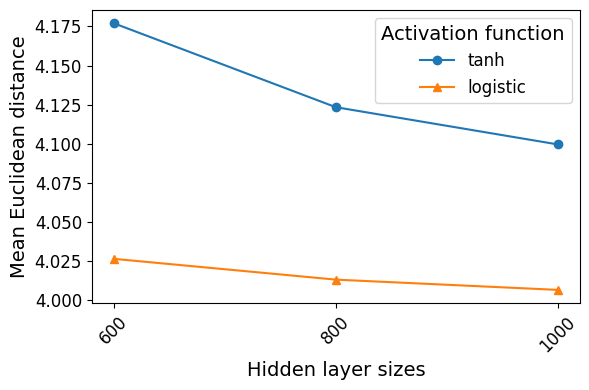

In [9]:
def unique(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

layer_sizes = [x["hidden_layer_sizes"] for x in grid_search.cv_results_["params"]]
activations = unique([x["activation"] for x in grid_search.cv_results_["params"]])
scores = -grid_search.cv_results_["mean_test_score"].reshape(len(activations), -1).T
plt.figure(figsize=(6,4))
for i, marker in zip(range(scores.shape[0]), ['o', '^']):
    plt.plot(scores[:, i], marker=marker)
plt.xticks(range(0, scores.shape[0]), layer_sizes[:scores.shape[0]], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Hidden layer sizes", fontsize=14)
plt.ylabel("Mean Euclidean distance", fontsize=14)
legend = plt.legend(activations, title="Activation function", fontsize=12)
plt.setp(legend.get_title(),fontsize=14)
plt.tight_layout()
plt.savefig("mlp_gridserach_results3.pdf", format="pdf")

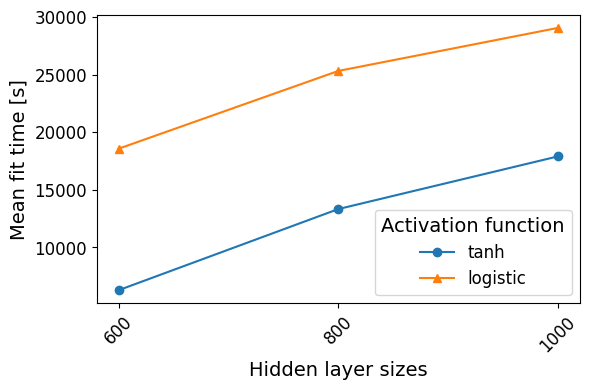

In [14]:
def unique(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

layer_sizes = [x["hidden_layer_sizes"] for x in grid_search.cv_results_["params"]]
activations = unique([x["activation"] for x in grid_search.cv_results_["params"]])
times = grid_search.cv_results_["mean_fit_time"].reshape(len(activations), -1).T
plt.figure(figsize=(6,4))
#plt.yscale("log")
for i, marker in zip(range(times.shape[0]), ['o', '^']):
    plt.plot(times[:, i], marker=marker)
plt.xticks(range(0, times.shape[0]), layer_sizes[:times.shape[0]], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Hidden layer sizes", fontsize=14)
plt.ylabel("Mean fit time [s]", fontsize=14)
legend = plt.legend(activations, title="Activation function", fontsize=12)
plt.setp(legend.get_title(),fontsize=14)
plt.tight_layout()
plt.savefig("mlp_gridserach_fit_time2.pdf", format="pdf")

In [10]:
EVALUATIONPATH = "./data/DSL_Winter_Project_2024/DSL_Winter_Project_2024/evaluation.csv"
evaluation = pd.read_csv(EVALUATIONPATH, index_col="Id")
#X_ev = X_ev[generateColumnsNames("area", ignore=noisyIndexes) + generateColumnsNames("pmax", ignore=noisyIndexes)]
X_ev = evaluation[featuresLabels]

X_ev_std = stdScaler.transform(X_ev.values)

Y_ev = grid_search.predict(X_ev_std)


In [11]:
output = pd.DataFrame()
Y_ev_df = pd.DataFrame(Y_ev)
display(Y_ev_df)
#output['Predicted'] = (Y_ev_df[0]).round().astype(str) + "|" + (Y_ev_df[1]).round().astype(str)
output['Predicted'] = (Y_ev_df[0]).astype(str) + "|" + (Y_ev_df[1]).astype(str)
output.to_csv("submission13_GS3_MLP9.csv", index_label="Id")

,0,1
0,487.723546,329.725772
1,541.523219,571.621981
2,209.891720,395.850960
3,581.325519,512.269135
4,362.264276,362.389688
...,...,...
128495,440.292997,264.992738
128496,280.312237,226.010322
128497,457.099692,587.591081
128498,230.995600,385.741909
